PHASE 3 PROJECT - Customer Churn Prediction for SyriaTel Telecom
STUDENT NAME; CHEBET SHARON
STUDENT PACE; Data Science Part Time
INSTRUCTOR NAME; MARYANN MWIKALI
DATA SOURCE; KAGGLE

SECTION 1: BUSINESS UNDERSTANDING
BUSINESS PROBLEM
SyriaTel is having customer churn and that is directly impacting revenue and profit. For that, the company must know what causes customer to be dissatisfaction. SyriaTel can’t develop retention plans without understanding churn and high-risk customers, leading to continued customer loss and a decline in market share.

OBJECTIVES
Identify key factors influencing customer churn.
Predict customer churn.
Provide actionable insights to enable SyriaTel to implement targeted interventions.

STAKEHOLDERS
SyriaTel Telecommunications Company.
Marketing team
Customer care service team
product development team

DATA PREPARATION

In [41]:
#importing relevant libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import sqlite3
from sklearn.linear_model import LinearRegression
from scipy import stats
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
ignore_warnings = True
if ignore_warnings:
    import warnings
    warnings.filterwarnings("ignore")

In [42]:
#loading data from a CSV file
df = pd.read_csv('Data/churn.csv')

In [43]:
# Display the first few rows of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [44]:
#Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [45]:
#describe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

DATA CLEANING

In [46]:
# Check for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in our data set

In [47]:
df.duplicated().sum()

0

there are no duplicated rows in our data

In [48]:
#Drop irrelevant columns

df.drop(columns=['state', 'area code', 'phone number'], axis=1, inplace=True)

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS
We'll explore key variables to understand their distributions and identify any patterns.

1.Distribution of categorical data

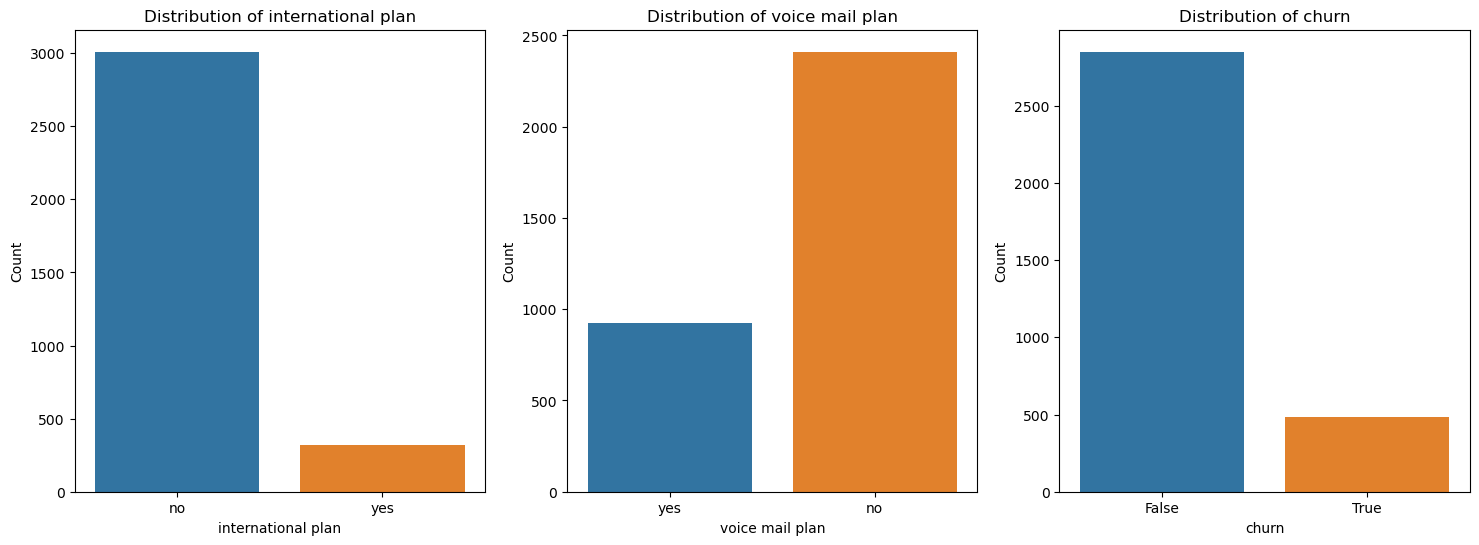

In [49]:
# List of columns with categorical data
columns = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

Majority of the customers have no international plan and voicemail plan.
The number of customers who churn (stop using SyriaTel) are less.

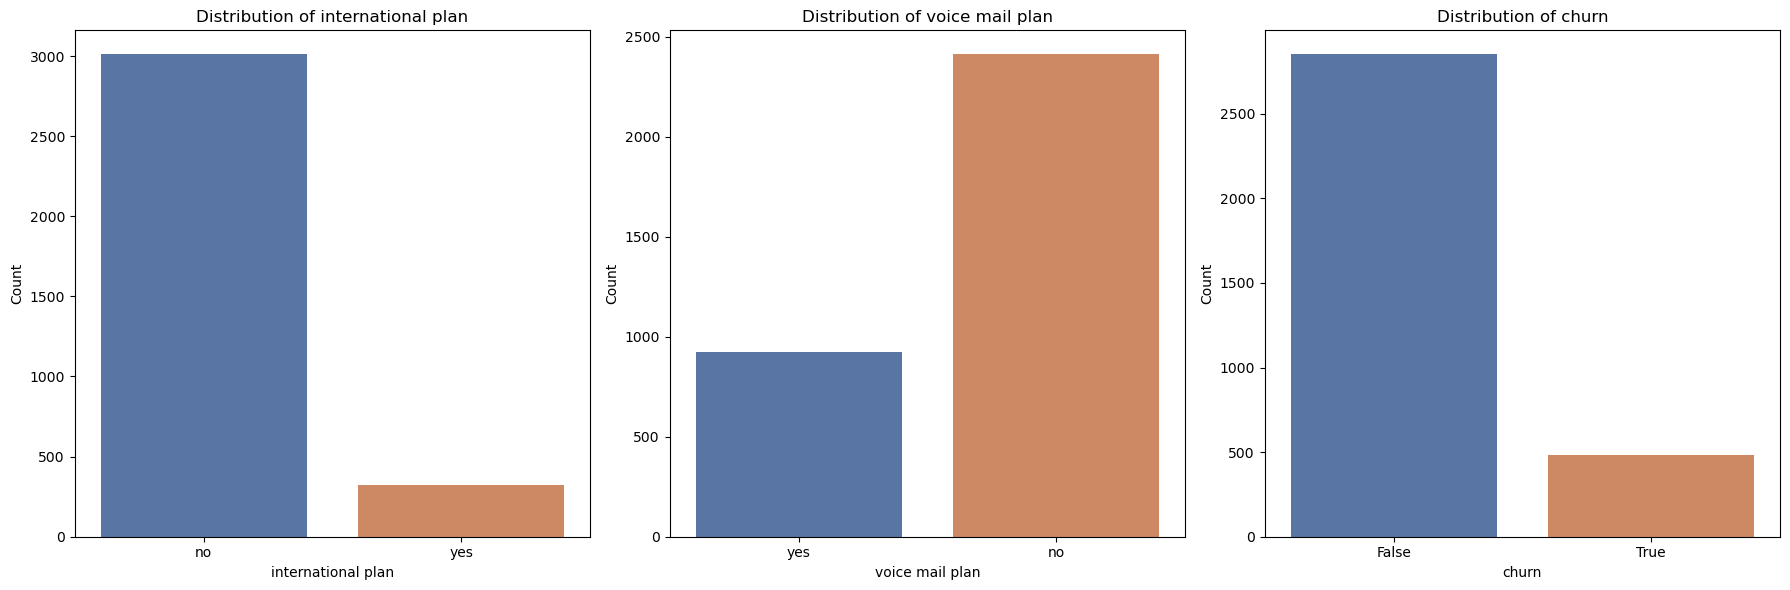

In [50]:
# List of columns with categorical data
columns = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


2. distribution of numerical data

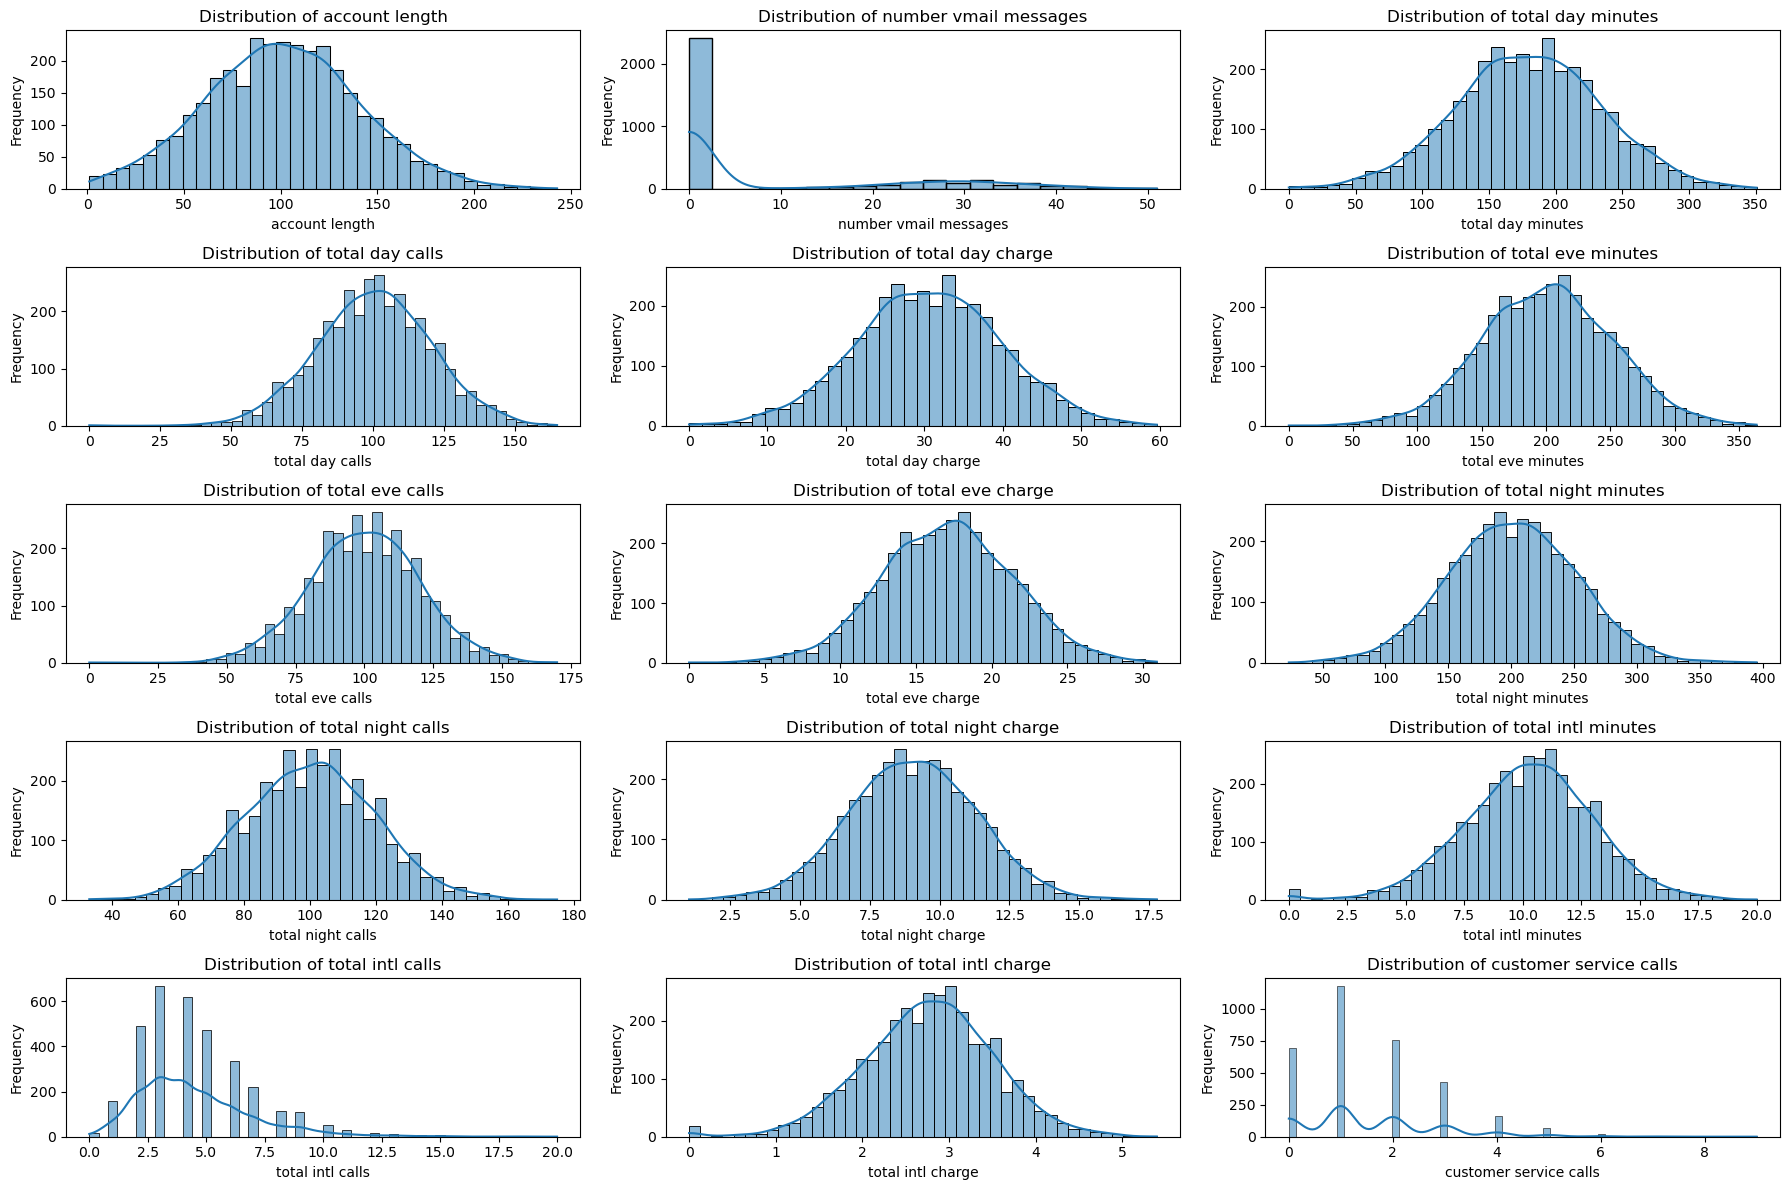

In [51]:
# List of columns with numerical data
columns = df.drop(columns=['voice mail plan', 'international plan', 'churn'], axis=1).columns

fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create histogram plots
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

-Distribution of account length appears approximately normal, suggesting that the data is symmetrically distributed around the mean. Majority of the customers have an average account life span.

-Distribution of number voicemail messages is highly right-skewed with a large number of customers having 0 voicemail messages. Most customers don't use the voicemail service. A few have a higher number of message,./'.

-Distribution of total minutes appear to follow a roughly normal distribution, centered around the mean. Majority of customers use a moderate number of total minutes, with fewer using extremely low or high total minutes.

-Distribution of total calls is also normal, suggesting a balanced call usage pattern. Most customers make an average number of calls, with fewer customers making an extremely low or high number of calls.

-Distribution of total charge mirrors the distribution of total minutes, as charges are directly proportional to the minutes used. The spread indicates that customers have varied levels of charges, but most fall within the central range.

-Distribution of customer service calls is right-skewed, with most customers making 0 to 1 customer service calls. There are a few spikes at higher values. Most customers rarely contact customer care service. However, customers who call frequently might indicate dissatisfaction/unresolved issue, which could correlate with churn.

Multivariate Analysis
This examines the relationship between the target variable (churn) and other features and also multiple features against other multiple features.

Distribution of international and voicemail plans by churn

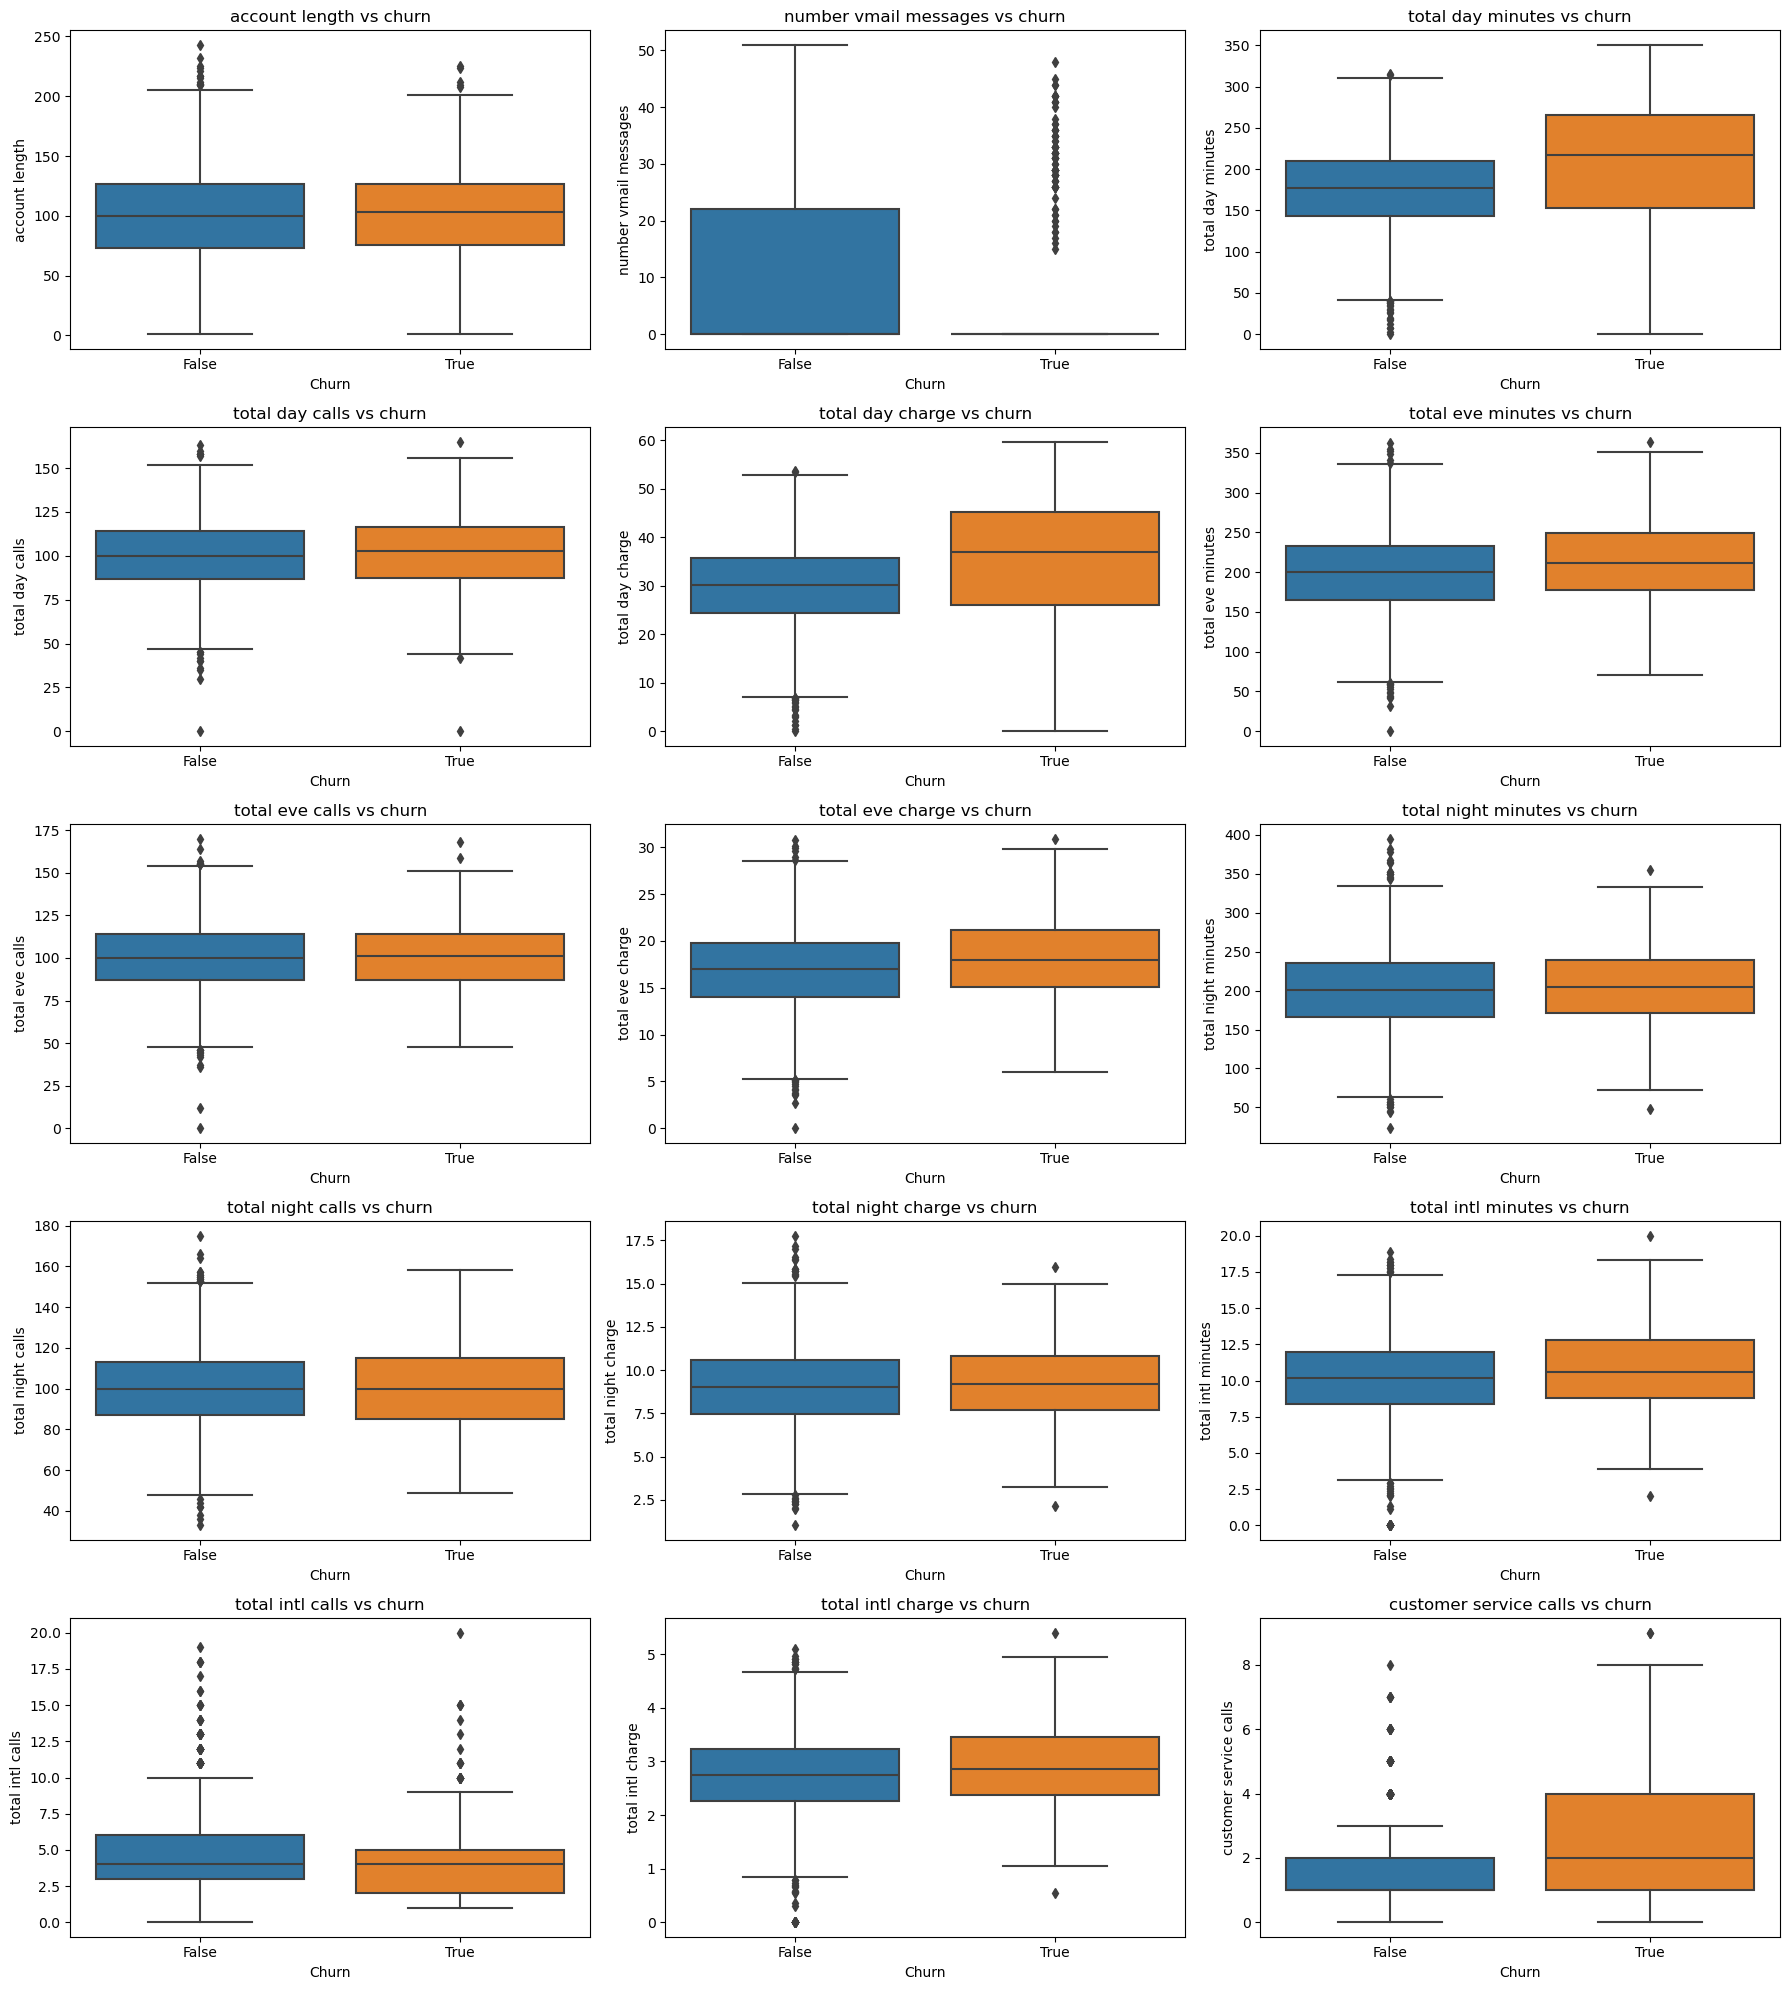

In [52]:
# List of numerical columns excluding 'voice mail plan', 'international plan', 'churn'
columns = df.drop(columns=['voice mail plan', 'international plan', 'churn']).columns

n_cols = 3
n_rows = int(np.ceil(len(columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=df, x='churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Churn versus various data

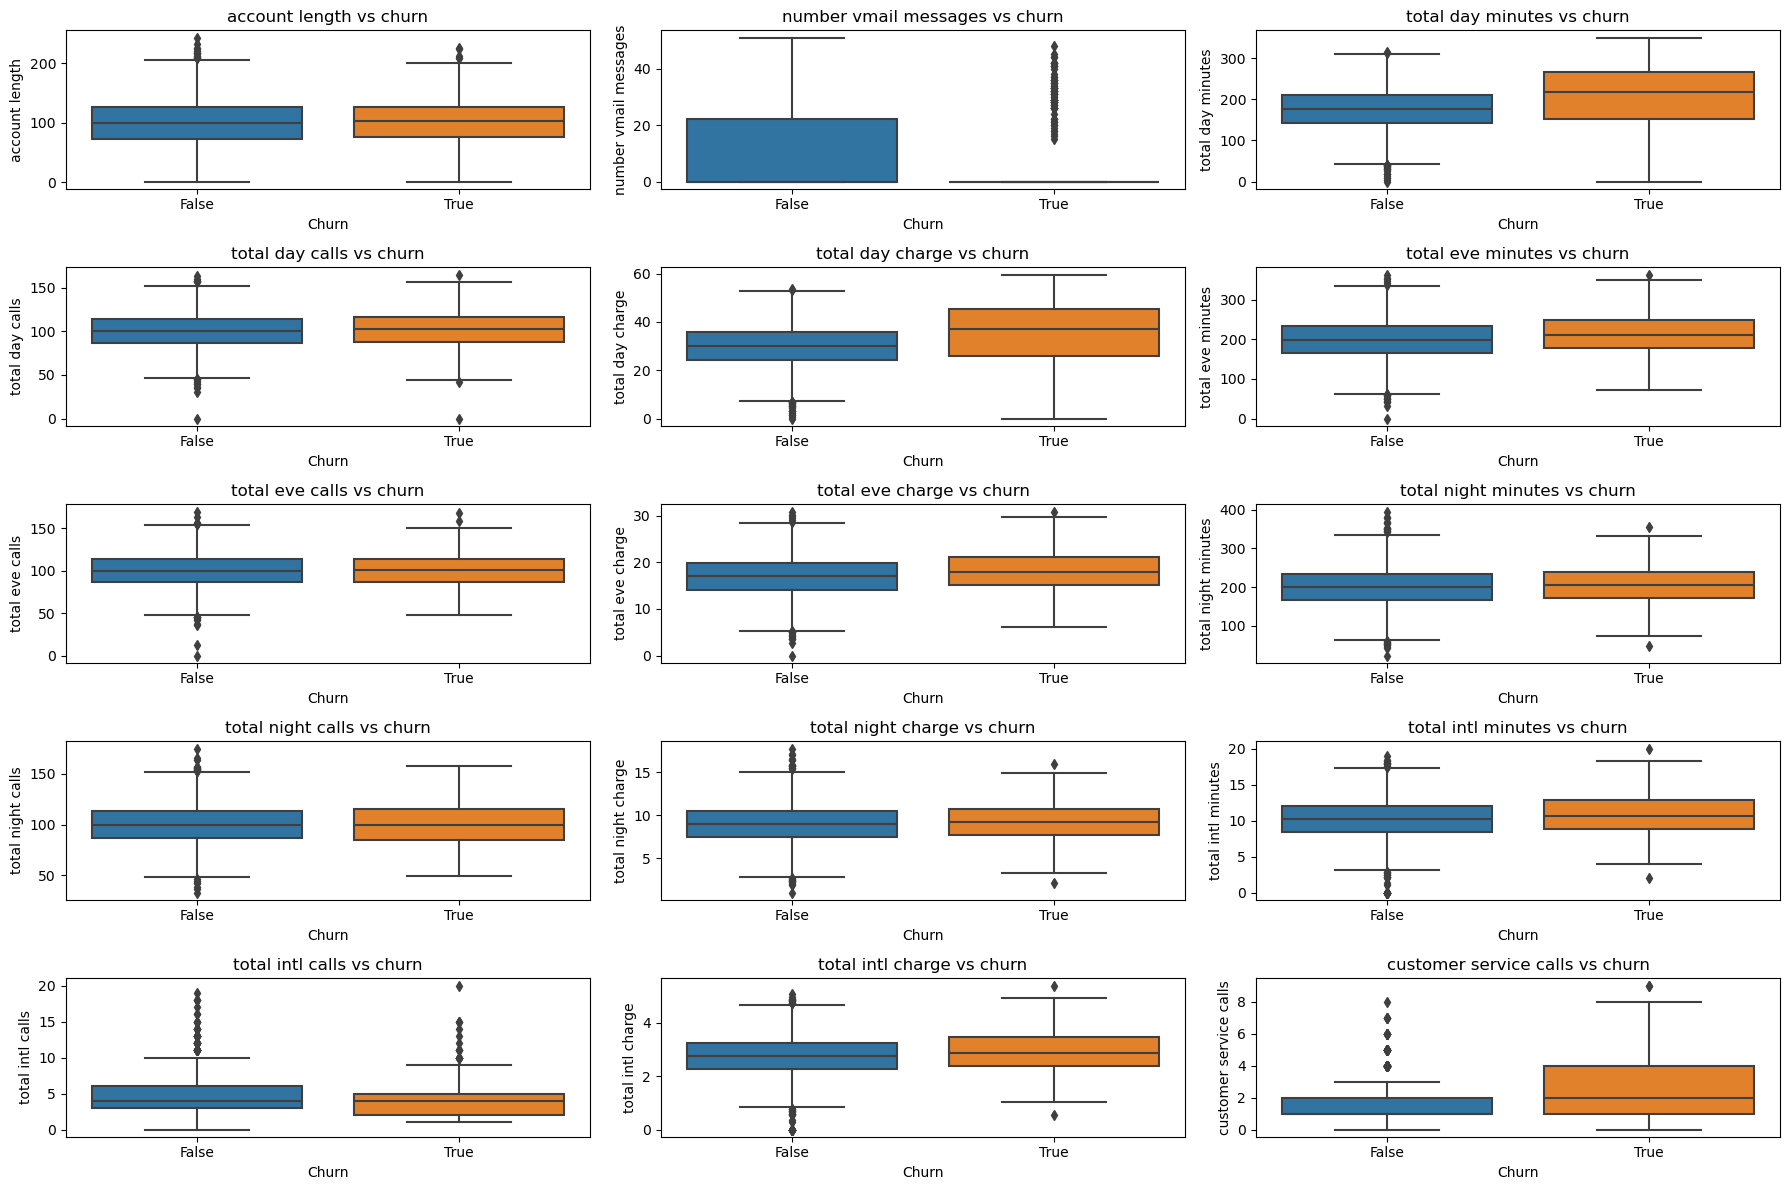

In [53]:
fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=df, x='churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(f'{col}') 

plt.tight_layout()
plt.show()

-Account length 
Both churned and non-churned customers show similar distributions for account length, with no major differences.
Account length might not be a significant factor in predicting churn.

-Number of Voicemail Messages vs churn
The majority of customers have a low number of voicemail messages.
There are many outliers at the upper end, suggesting some customers have significantly higher voicemail messages than the rest.

-Total Minutes vs churn
Non-churn customers: Total minutes appear to be centered around a slightly lower range.
Churned customers: They have a wider range of total minutes, with a higher median.
Customers with higher total usage might be more likely to churn, potentially due to high costs.

-Total Calls vs churn
Both churned and non-churned customers show similar distributions for total calls, with no major differences.
Total calls might not be a significant factor in predicting churn.

-Total Charge vs churn
Non-churn customers: Charges are lower and have a narrower spread.
Churned customers: Charges are higher and exhibit a wider spread.
Higher total charges are associated with churn, suggesting dissatisfaction with billing or costs.

-customer Service Calls vs churn
Non-churn customers: Fewer customer service calls, with most data concentrated at the lower range.
Churned customers: More customer service calls.
High interaction with customer service is associated with churn, could be because of unresolved issues or dissatisfaction.

corrrelation analysis

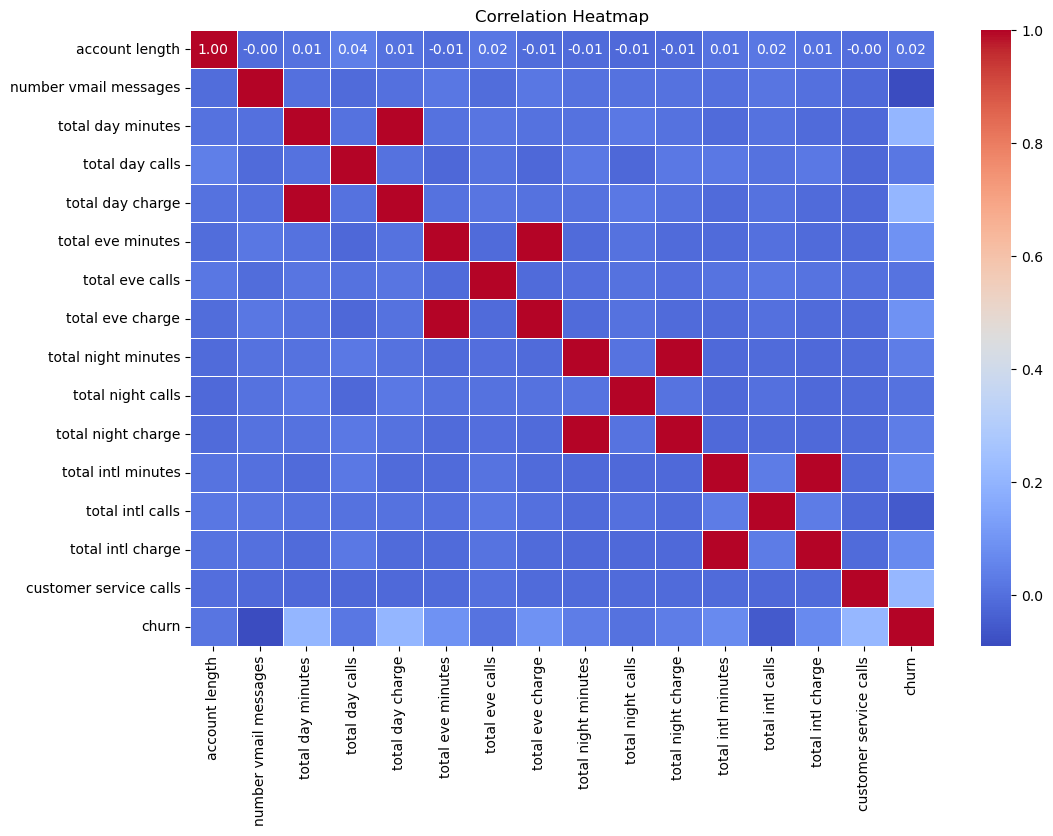

In [54]:
# Plot heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.

Columns that are perfectly correlated provide redundant information, it's generally best to drop one of them to avoid multicollinearity and improve the model.

In [55]:
# Calculate absolute values of correlations
corr_matrix = df.corr(numeric_only=True).abs()

# Create an upper triangle matrix to avoid checking the same correlation twice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns that have correlation higher than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the columns from the dataframe
df.drop(to_drop, axis=1, inplace=True)

In [56]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [57]:
df['churn'] = df['churn'].map({False:0, True:1})

In [63]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


TRAIN TEST SPLIT

In [61]:
# Define features and the target variable
X = df.drop(['churn'], axis=1)
y = df['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

SMOTE

In [69]:
# Apply SMOTE to the training set
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns in X_train and X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [73]:
categorical_columns = ['international plan', 'voice mail plan']
numerical_columns = X.drop(categorical_columns, axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# fit only numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_scaled_resampled = scaler.transform(X_train_resampled[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Combine the scaled numerical columns and categoricalcolumns into one dataframe
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_columns), X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_train_scaled_resampled = pd.concat([pd.DataFrame(X_train_scaled_resampled, columns=numerical_columns), X_train_resampled[categorical_columns].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_columns), X_test[categorical_columns].reset_index(drop=True)], axis=1)

Modelling and Evaluation
CHOSEN MODELS;

1.Logstic regression model. Since it is well-suited for binary classification problems like the one we are facing of predicting churn or no churn.
2.Random forest classifier.
These models' performance will then be evaluated by use of classification metrics such as roc-auc score, precision, recall and F1 score.

1. Logistic Regression Model

In [74]:
from sklearn.model_selection import train_test_split
# Initialize logistic regression
lr = LogisticRegression(random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [75]:
# Initialize logistic regression
lr = LogisticRegression(random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

MODEL EVALUATION

In [76]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       709
           1       0.32      0.74      0.45       125

    accuracy                           0.73       834
   macro avg       0.63      0.73      0.63       834
weighted avg       0.85      0.73      0.76       834

Logistic Regression ROC-AUC Score: 0.8191


ROC CURVE

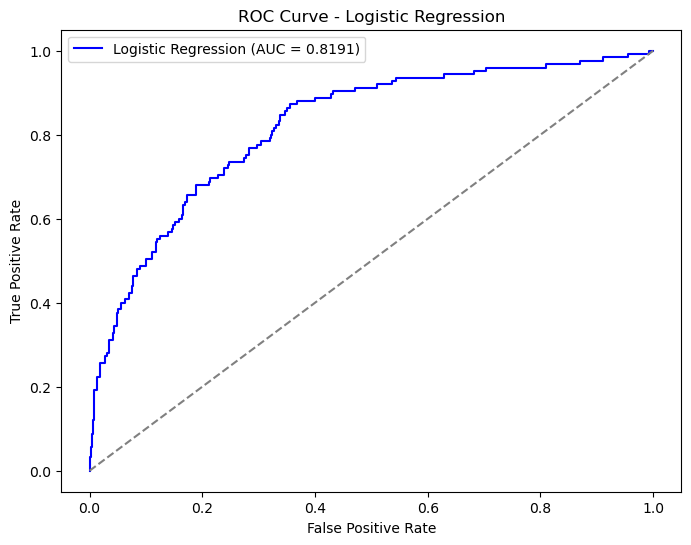

In [77]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend()
plt.show()

RANDOM FOREST CLASSIFIER

In [78]:
# Initialize random forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

EVALUATION

In [79]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       709
           1       0.97      0.58      0.73       125

    accuracy                           0.94       834
   macro avg       0.95      0.79      0.85       834
weighted avg       0.94      0.94      0.93       834

Random Forest ROC-AUC Score: 0.9307


ROC CURVE

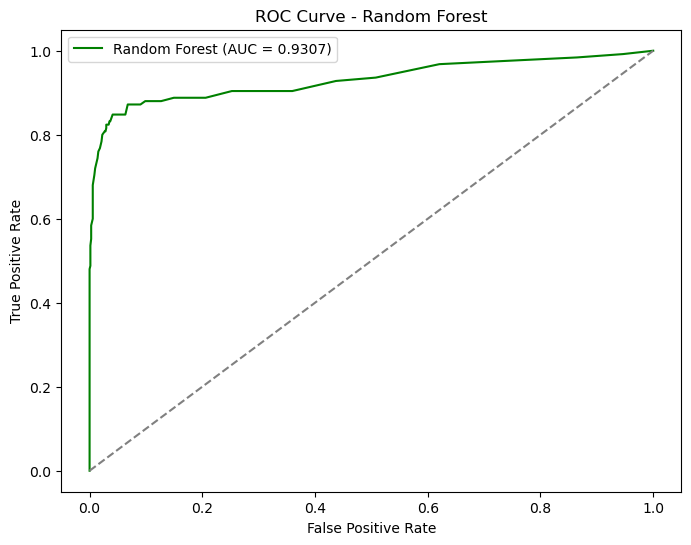

In [80]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")

plt.legend()
plt.show()

The ROC curve shows the performance of the Random Forest model in distinguishing between churn and non-churn customers.
The curve being close to the top-left corner indicate high sensitivity (true positive rate) and low false positive rate.
The AUC (Area Under Curve) is 0.9307, which is excellent and means the model has strong discriminatory power.
The Random Forest model is highly effective at predicting customer churn for this dataset.

COMPARISON

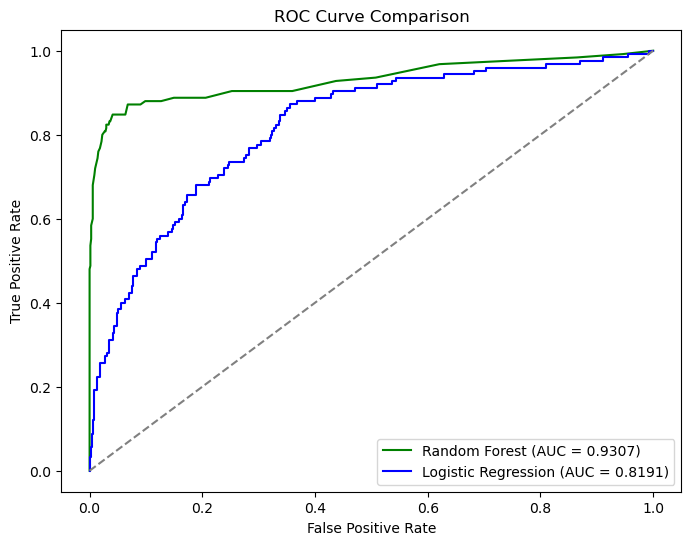

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")

plt.legend()
plt.show()

The closer the ROC curve is to the top-left corner, the better the model's performance. The Random Forest curve is consistently above the Logistic Regression curve.
Random Forest shows a better trade-off between True Positive Rate (Sensitivity/Recall) and False Positive Rate, making it the superior model for churn prediction.
Logistic Regression, while performing decently, has a lower ability to correctly classify churn cases compared to Random Forest.

Feature Importance Analysis
In this section, we analyze the importance of each feature in predicting customer churn using the Random Forest classifier. Feature importance quantifies how much each feature contributes to the model's decision-making process.

The features with the highest importance scores are the most influential in determining churn. By identifying these key drivers, we can better understand what factors lead to customer churn and target those areas for improvement. These insights can guide strategies, such as enhancing customer service for high-risk users or optimizing plans based on customer usage patterns.

                   Feature  Importance
2          voice mail plan    0.234481
10      total intl minutes    0.144677
11        total intl calls    0.092621
4        total day minutes    0.092374
6        total eve minutes    0.071237
8      total night minutes    0.069952
5          total day calls    0.052285
0           account length    0.051975
7          total eve calls    0.051300
3    number vmail messages    0.050205
9        total night calls    0.044514
1       international plan    0.028834
12  customer service calls    0.015543


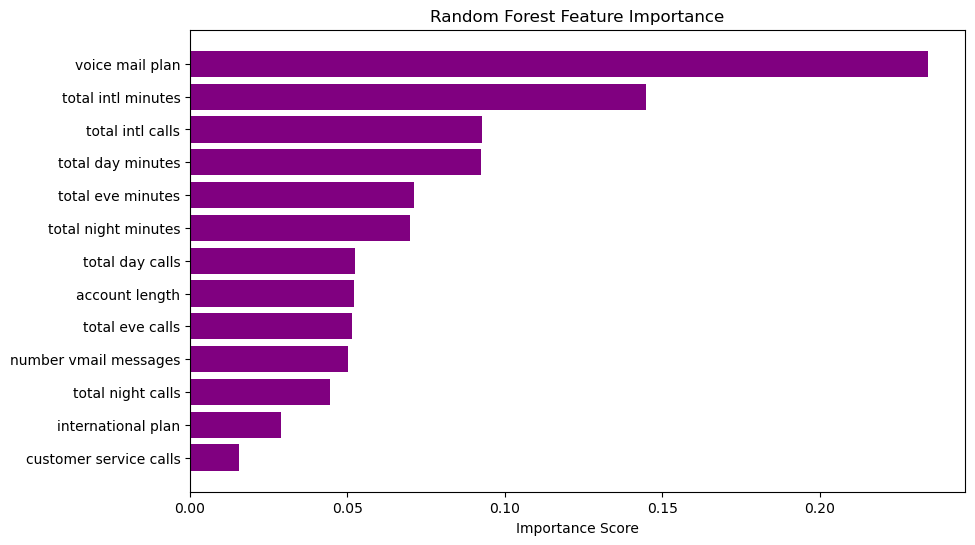

In [83]:
# Get feature importance scores from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='PURPLE')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()  

plt.show()

International plan, total international minutes and total day minutes are the strongest indicators of churn. This suggests that there is high usage internationally and during the day indicating that customers with such plans might have higher churn rates, possibly due to cost or service issues.
Features like total night calls and customer service calls have minimal predictive power.

Conclusion
Logistic Regression performs adequately on non-churn cases but struggles with churn detection, as indicated by the low precision and recall for churn. Its performance is acceptable when computational resources are limited, or when simplicity is desired, but it is not ideal for imbalanced datasets.
Random Forest, on the other hand, provides a more balanced performance across both classes, with better handling of class imbalance. It achieves high precision and recall for non-churn and performs significantly better than logistic regression for churn detection, though it still misses some churn cases. Its ROC-AUC score is much higher, indicating superior discrimination power.

RECOMMENDATIONS

-Random Forest is the better model if your goal is to achieve a more robust performance for detecting churn while handling class imbalance. 
The higher ROC-AUC score and overall classification report indicate its suitability for this task.
-If interpretability and computational efficiency are key, Logistic Regression might be preferred, but more techniques like tuning the model further or applying SMOTE could help improve its performance.

As shown in feature importance analysis:
International Plans: Improve international plans to reduce customer dissatisfaction.
Focus on Daytime Users: Monitor customers with high daytime usage and offer timely support so they don't churn